In [ ]:
# Improtamos las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importamos los datos
df = pd.read_csv('insurance.csv')

# Imprimimos los primeros registros para conocer nuestro dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Descripción de las variables y del dataset extraído de [kaggle](https://www.kaggle.com/code/mariapushkareva/medical-insurance-cost-with-linear-regression/notebook)

Many factors that affect how much you pay for health insurance are not within your control. Nonetheless, it's good to have an understanding of what they are. Here are some factors that affect how much health insurance premiums cost
* age: age of primary beneficiary

* sex: insurance contractor gender, female, male

* bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

* children: Number of children covered by health insurance / Number of dependents

* smoker: Smoking

* region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest

In [4]:
df.shape

(1338, 7)

In [5]:
# Obtenemos estadísticas descriptivas del dataset
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
# Indagamos si cuenta con valores nulos
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Observamos que no cuenta con valores nulos

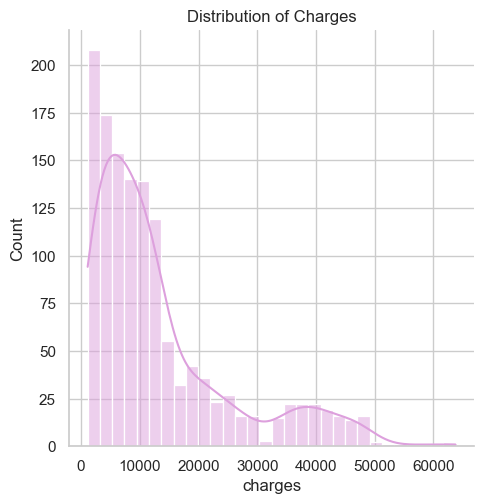

In [12]:
# Creamos un visualización de su distribución
sns.displot(df['charges'], kde = True, color = 'plum')
plt.title('Distribution of Charges')
plt.show()

Observamos que la distribución de las cuotas se encuentra  sesgada hacia la derecha.

In [13]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
charges      float64
dtype: object

In [14]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes
# Esto para poder utilizar las variables dentro de la regresión lineal

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

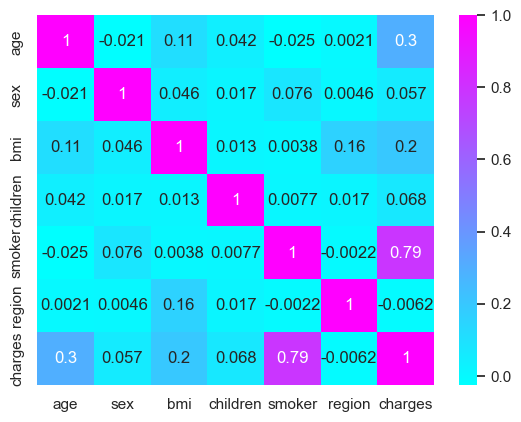

In [15]:
# Observamos la correlación entre variables
sns.heatmap(df.corr(), annot=True, cmap='cool')
plt.show()

En una primera impresión que las variables que más influyen en las cuotas son el si el paciente es fumador o no, el número de hijos y la edad, en primer, segundo y tercer lugar respectivamente.

In [32]:
# Aplicando el modelo de regresión lineal 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=54)
# Añadir constante para el intercepto en x_train
x_train_sm = sm.add_constant(x_train)

# Ajustar el modelo de regresión OLS (con datos de entrenamiento)
modelo = sm.OLS(y_train, x_train_sm)
resultado = modelo.fit()

# Ver el resumen del modelo
print(resultado.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     595.1
Date:                Fri, 14 Feb 2025   Prob (F-statistic):               0.00
Time:                        22:04:45   Log-Likelihood:                -10807.
No. Observations:                1070   AIC:                         2.163e+04
Df Residuals:                    1063   BIC:                         2.166e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.167e+04   1043.518    -11.179      0.0

Del dataset, podemos observar que de las variables se confirma que el hecho de que el paciente sea o no fumador es la variable que más influye, además de que se comprueba que es estadísticamente significativa en el modelo p-value < 0.05.
Además, observamos que en términos generales el modelo explica una parte considerable de varianza (R-squared: 0.771)